본 교육자료는 OUTTA 교육자료팀의 고유 창작물이되 OUTTA 교육자료 및 'https://pytorch.org/tutorials/beginner/basics/data_tutorial.html' 의 내용을 바탕으로 검토하여 구성되었음을 밝힙니다.

※ OUTTA의 허가 없이 함부로 자료를 무단 배포하는 것을 엄격히 금합니다. ※

<br>
Pytorch 라이브러리 소개는 아래과 같이 tensor의 operation, autograd, dataset and loader, 이후 CNN 학습의 순서로 구성되어 있습니다.

## 1. Pytorch

### Tensor
우리가 알고 있는 numpy 배열과 유사한 tensor라는 개념은 Pytorch에서 매우 중요하다. 아마 mynn 라이브러리를 활용하여 tensor을 이용했을 때에는 'from mygrad import Tensor'을 사용했을텐데 Pytorch에는 이 기능이 default로 들어가 있기 때문에 torch만 import 해줘도 자유롭게 사용할 수 있다.
이 개념은 배열이나 행렬로 이해해도 좋으며 우리가 원하는 배열을 집어 넣어서 새로운 행렬을 생성할 수 있다. 이렇게 생성한 텐서로부터 우리가 원하는 정보를 추출할 수도 있고 행렬과 마찬가지로 이들 간의 사칙연산도 Pytorch에서 가능하다.
- Tensor 만들기: torch.tensor(data: Any, dtype: _dtype | None = None, device: _device), torch.empty(shape), torch.rand(shape), torch.ones(shape), torch.zeros(shape) - 이때의 shape은 우리가 만들고자 하는 tensor의 차원을 지정해준다. 만약 2차원으로 tensor을 형성하고 싶다면 (a,b)을 shape에 입력해주면 a X b와 같은 행렬을 얻을 수 있다.

In [ ]:
import torch

a = torch.empty(4,5) # 4X5 empty matrix 생성
print(a)
# +) tensor로 잘 형성되었는지 확인해보고 싶다면 a의 data type을 확인해보면 된다.(e.g. float32로 출력된다면 32 bit의 float 자료형이 형성되었음을 의미)
print(a.dtype)

# torch.empty로 tensor을 형성하는 것은 tensor를 초기화하지 않았기 때문에 단순히 2차원의 4 x 5 행렬을 생성해준 꼴
# 초기화하고 싶다면?
b = torch.zeros(4,5) # 영행렬
c = torch.rand(3,4) # random한 숫자로 배열을 채움.
d = torch.ones(3,4) # 모든 원소가 1인 3 x 4 array


print(b)
print(c)
print(d)

이제 tensor 형성의 기본을 익혔으니 직접 데이터를 텐서 안에 넣어 초기화하여 형성하는 방법을 공부해봅시다.

In [ ]:
X_data = ([1,2], [3,4])
# 이런 조합으로 이루어진 데이터를 tensor 자료형으로 만들고 싶다면?

tensor_with_Data = torch.tensor(X_data)
print(tensor_with_Data) # 이 tensor의 size을 예측해보세요!

In [ ]:
print(tensor_with_Data.size())
# tensor에 우리가 원하는 방향으로 data가 잘 입력되었는지 안전하게 확인해주고자 size()을 이용한다.

In [ ]:
print(tensor_with_Data.shape)

In [ ]:
# 자료형을 명시적으로 지정하여 tensor을 형성할 수도 있다.
tensor_with_dtype1 = torch.tensor([1,2], dtype=float)
tensor_with_dtype2 = torch.tensor([1,2], dtype=int)
print(tensor_with_dtype1)
print(tensor_with_dtype2)
# 차이점을 확인해보세요!

마지막으로 tensor.torch()에 적혀있는 device는 말그대로 이 tensor가 저장된 장소를 가리킨다.

In [ ]:
print(tensor_with_Data.device)

### Operation
지금부터 tensor을 다양하게 활용해보려 한다. 기본적으로 텐서끼리는 사칙 연산이 가능하다. Pytorch 내에 연산자(operator)가 내장되어 있기 때문에 따로 연산자 오버로딩을 해주지 않아도 /, +, -, *의 연산자를 자유롭게 사용할 수 있다. 이건 예시를 통해서 보도록 하자!

In [ ]:
tensor1 = torch.tensor([[5,10],[6,12]])
tensor2 = torch.tensor([[1,2],[3,4]])
operation1 = tensor1 / tensor2
operation2 = tensor1 + tensor2
operation3 = tensor1 - tensor2
operation4 = tensor1 * tensor2
print(operation1)
print(operation2)
print(operation3)
print(operation4)

그렇다면 행렬곱(matrix multiplication)은 어떻게 진행할까? 이는 위의 코드에서 수행했던 '*' 연산자와 혼동할 수 있음에 주의해야 한다. <br> 행렬의 연산은 A X B에서 A의 행과 B의 열을 곱하여 연산한다. 따라서 tensor.T을 이용해 뒤에 곱할 행렬의 행과 열을 바꿔주어 전치행렬로 만들어야 한다.
혼동할 시 아래와 같은 문제가 발생할 수 있다.(아래 예시는 Pytorch에 내장된 torch.matmul(tensor,tensor)을 이용한다.)

In [ ]:
tensor1 = torch.tensor([[10,20],[2,4]])
tensor2 = torch.tensor([[5,10],[1,2]])
operation4 = tensor1 * tensor2
# tensor 내에서 동일한 위치에 있는 요소들끼리의 곱을 반환
print(operation4)

op_matmul1 = tensor1 @ tensor2.T # '@' 연산자는 행렬곱을 위한 연산자
print(op_matmul1)

op_matmul2 = tensor1.matmul(tensor2.T) # 위와 동일한 결과로 내장함수 matmul 사용
print(op_matmul2)

만약 이전에 파이썬을 공부해본 경험이 있다면 배열을 생성할 때나 int, float등을 형성할 때 연산과 동시에 저장하는 법을 배웠을 거다. 주로 연산자 '+=, -=, *=, /='나 배열의 경우에는 .append()을 사용하여 추가했다. 그럼 tensor에는 어떻게 이를 반영할 수 있을까?
바꿔치기 연산이라 불리는 in-place 연산을 수행하기 위해 Pytorch에는 언더바라는 접미사가 존재한다. 원하는 operation 뒤에 접미사 언더바를 붙이면 됩니다.(연산을 한 결과를 동시에 저장해서 이전 것을 업데이트하기 때문에 바꿔치기란 이름이 붙는다.)
<br>
그렇다면 기존 파이썬에서 사용하던 += 등의 연산자는 tensor 연산이 불가능할까? 아래 코드를 실행시켜보자.

 add_() method, which adds 1 to each element of the tensor in place. The add_() method modifies the original tensor rather than creating a new one.
 <br>
 which adds 1 to each element of the tensor in place. This is a shorthand notation for the add_() method.

In [ ]:
tensor1 = torch.tensor([[1,2],[3,4]])
tensor2 = torch.tensor([[1,2],[3,4]])

tensor1.add_(1)
print(tensor1)

tensor2+=1
print(tensor2)

tensor1.multiply_(3)
print(tensor1)

tensor2*=3
print(tensor2)

동일한 결과가 나오는 것을 알 수 있다. 이처럼 Pytorch에는 다양한 연산자가 있어 tensor 연산은 자유로운 편이다. 다만 앞서 소개한 행렬곱 연산에만 조금 유의하면 될 것 같다.
이렇게 간단한 상황에서는 위 in-place 연산을 써도 좋으나 후에 신경망을 구성하고 모델을 세팅해 학습하는 과정에서 이 연산자는 매우 위험하다. 그 이유는 바로 뒤이어 나올 'Autograd' 개념을 통해 알아보겠다.

### Autograd
CNN을 공부했다면 이 autograd의 중요성을 어느정도 이해했을 것이라 생각한다. 사실 처음 접하면 대체 왜 기울기를 얻지?하는 의구심이 들 수 있다. 배웠듯이 이는 loss을 줄여나가기 위하나 과정이다!
forward propagation만을 수행하기보다는, 보다 나은 모델의 학습을 위해 우리는 back propagation도 함께 수행한다. 즉 forward propagation에서 얻은 gradient가 back propagation을 진행하면서 사용된다. 보다 loss을 최적으로 줄일 수 있는 gradient descent(경사하강법)을 이용하며 이는 forward propagation만 수행했을 때 보다 훨씬 더 적은 연산을 하도록 하기 때문에 모델 학습과 불가분한 존재라고 할 수 있다.

'import mygrad as mg'로 자동미분 라이브러리를 불러오고, 만약 불러온 다음에 이 기능을 사용하고 싶지 않다면 'with mg.no_autodiff:'로 함수 내에 작성해줄 수 있지만 pytorch에서는 이 기능을 'autograd'라는 이름을 가진 라이브러리로 제공한다. tensor에 적용하고 싶다면 tensor을 형성할 때 'requires_grad=True'라는 문구를 추가해주면 된다. 이 문구를 추가해줌으로써 우리는 나중에 각 tensor에 대한 gradient값을 얻을 수 있다. 이 gradient는 결국 forward propagation에 사용될 가중치가 loss을 보다 최소화할 수 있는 방향으로 업데이트 해주는 역할을 한다.

*** gradient는 back propagation으로 얻을 수 있는 term이므로 backward() 실행 후 gradient을 얻어야한다.

마찬가지로 pytorch 환경에서 자동미분 기능을 적용하고 싶지 않다면 'with mg.no_autodiff:' 대신 'with torch.no_grad():'로 대체해주면 된다.

In [ ]:
#단일 scalar
import torch
autograd1 = torch.ones(1,requires_grad=True)
#torch.ones: Returns a tensor filled with the scalar value 1, with the shape defined by the variable argument size.
# torch.ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
print(autograd1)
autograd1.backward()
print(autograd1.grad)

In [ ]:
#단일 tensor
autograd2 =  torch.tensor([1,2],dtype=float,requires_grad=True)
print(autograd2)
autograd2.backward()
print(autograd2.grad)

마지막 코드에서 'autogra2'의 backward 연산이 제대로 이루어지지 않을 것을 볼 수 있다. 이는 tensor가 스칼라형이 아니기 때문이다. 이 경우 tensor을 이루는 요소 간의 평균을 내준 후 back propagation을 수행하여 gradient을 얻어야 한다.

*** +) autograd2를 활용한 새로운 tensor을 형성한 후, 그 평균을 바탕으로 back propagation을 수행하면 자동으로 autograd2의 gradient에 저장된다. 즉 backward()을 호출할 때마다 특정 자료형에 기울기는 누적되어 저장될 수 있다. 이 내용은 아래 코드의 두번째 블록에서 확인하기 바란다.

In [ ]:
autograd2 = torch.tensor([1,2,3], dtype = float, requires_grad = True)

gradient = (autograd2).mean() #scalar형으로 만들기 위해 평균 , (1 + 2 + 3) /3 = 2
gradient.backward()
print(autograd2.grad)

gradient2 = (autograd2+5).mean() #(6 + 7 + 8) /3 = 7
gradient2.backward()
print(autograd2.grad) # autogra2.grad에 기울기가 누적됨을 알 수 있음!

이처럼 앞서 정의내린 tensor가 포함된 채로 back propagation이 수행되면 계속 기울기가 누적된다. 만약 'requres_grad = True'를 포함시켜 'x'라는 tensor을 만들었다고 해보자.
이때 x을 활용한 새로운 연산을 해보고 싶은데 gradient에는 반영하고 싶지 않다면 어떻게 해야 할까? 기존에 정의내린 x을 지우고 다시 해야 할까?
이럴 때 유용하게 사용할 수 있는 기능이 바로 with torch.no_grad()있다.
<br> ->이 with 블록 안에 autograd을 수행하고 싶지 않은 연산을 포함시키면 된다. 이때 gradient을 출력해보면 'None'이 뜨는 것을 확인할 수 있다.

In [ ]:
x = torch.ones(1,requires_grad=True)
with torch.no_grad():
    y = x * 2
    print(y.grad)
print(x)

----------- ----------- -----------
# 본격적인 CNN 실습 : MNIST data classification
----------- ----------- -----------

### Dataset and loader
신경망 학습을 위해선 데이터셋을 불러오고 이를 load하는 작업이 필수적이다. 실제 torch에서는 다소 복잡한 방식으로 데이터셋을 불러오는 과정이 구현된다.

In [ ]:
import csv # 학습된 신경망을 불러올 때는 주로 csv 파일을 불러옵니다. 혹은 dataset이 csv인 경우도 있다.
# 이번 실습에서는 npz의 dataset을 사용하기 때문에 import csv 부분이 필요하지는 않으나 신경망 학습에서는 거의 필수적이니 기억해두자!
import pandas as pd
import matplotlib.pyplot as plt

import torch
# torch에서 Computer vision 과제를 해결하기 위해 만든 라이브러
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
# Dataset에는 각 데이터 및 그에 대한 label, 정답이 저장되어 있음
# DataLoader는 이 dataset의 데이터를 쉽게 불러오는 역할(학습할 때 학습용 데이터를 불러오는 등)

In [ ]:
# mnist.npz 파일을 사용하였다.
# 학습용 데이터와 테스트용 데이터를 따로 불러온다.
# Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.
# 인터넷에서 바로 불러옴

train_data = datasets.MNIST(
    root="/Temp", # 경로(***본인이 다운로드 받은 경로로 설정)
    train=True,
    download=True,
    transform=ToTensor() # 데이터를 tensor로 바꿔주는 코드
)
test_data = datasets.MNIST(
    root="/Temp",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16583274.23it/s]


Extracting /Temp/MNIST/raw/train-images-idx3-ubyte.gz to /Temp/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 487220.54it/s]


Extracting /Temp/MNIST/raw/train-labels-idx1-ubyte.gz to /Temp/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4387058.99it/s]


Extracting /Temp/MNIST/raw/t10k-images-idx3-ubyte.gz to /Temp/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3124574.18it/s]

Extracting /Temp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Temp/MNIST/raw



transform = ToTensor()
여기서의 transform을 말그대로 무엇인가를 변형한다는 의미를 담고 있다. 이때 우리는 image dataset을 사용하고 있으므로 이 이미지를 tensor로 바꿔주는 작업이 필요하다. 앞서 공부한 autograd만 봐도 tensor에서 자동미분 기능을 실행하고 있었다. 이 기능을 포함해 신경망 학습을 위해선 결국 이미지, 오디오 등의 정보를 Pytorch가 처리할 수 있는 tensor로 바꿔주어야 한다. 데이터를 불러올 때 transform 기능을 명시해주는 것이 필수적인 이유이다.

### 각 데이터에 대한 DataLader 만들기
이제 앞서 import한 DataLoader을 이용해 각각의 train, test data에 대한 dataloader을 만들어준다.

In [ ]:
# batch 기능을 쉽게 하도록 함
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Train data에 대한 시각화
학습에 필요한 데이터셋의 준비는 마쳤으니 데이터셋이 어떻게 구성되어 있는지 한번 확인하고 넘어가보려 한다. 데이터셋은 총 10개 숫자에 대한 데이터셋이며 이 데이터셋을 이루는 데이터를 임의로 뽑아 그래프에 plot하여 데이터셋을 들여다보자.

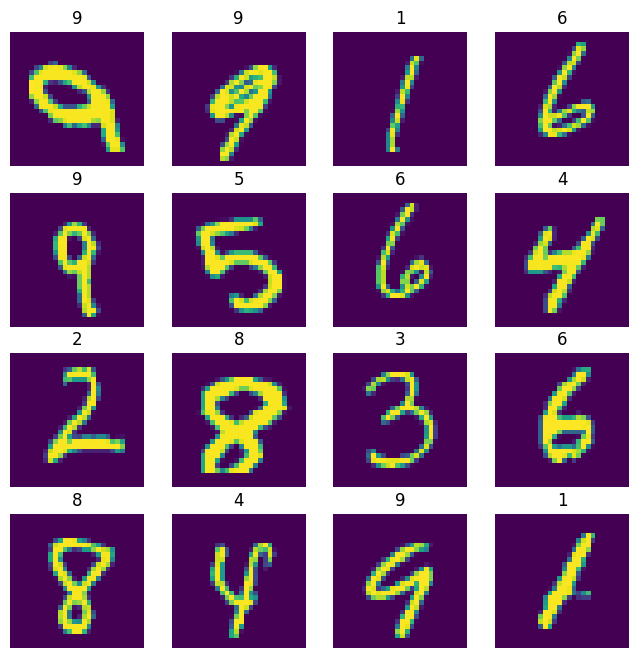

In [ ]:
figure = plt.figure(figsize=(8, 8)) # 데이터셋을 showing할 공간 만들기
column, row = 4, 4 # 본인이 데이터셋을 들여다 보고 싶은 만큼 행과 열을 조절할 수 있다.
title = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

for i in range(1, column * row + 1):
    # pick
    idx = torch.randint(len(train_data), (1,)).item() # train_data를 이루는 데이터의 index를 랜덤하게 뽑아 1차원 벡터로 만듦.
                        # torch.randint ==  Returns a tensor filled with random integers generated uniformly between low (inclusive) and high (exclusive).
    img, label = train_data[idx] # idx 번째의 train_data는 image와 label(정답)로 이루어져있으므로 img, label로 분리

    # show
    figure.add_subplot(row, column, i) # add_subplot(nrows, ncols, index, **kwargs)의 함수 사용
    plt.title(title[label]) # 사진 위에 라벨 띄워줌
    plt.axis("off") # 깔끔하게

    plt.imshow(img.squeeze()) # squeeze()를 해주지 않으면 img.shape = (1,28,28)이므로 show()를 하지 못하고 에러 발생 --> 1차원을 없애주기위해 squeeze()를 해줌.
    # print(img.shape) -> torch.Size([1,28.28])
    # print((img.squeeze()).shape) -> torch.Size([28,28])

이번 실습의 경우 데이터셋을 한꺼번에 불러와서 학습을 진행해도 큰 무리가 (비교적 작은 데이터셋이기 때문) 없으나 세상에는 용량이 어마무시한 데이터셋들이 많다. 이 경우에는 일반적으로 Customdataset class을 만들어서 데이터를 하나씩 불러오도록 하는데, 이때 class을 구성하는 함수에 대해 잠시 짚고 넘어가보자.

class CustomDataset은 총 3개의 함수로 구성되어 있다.
<br>
1. def __init__(self,csv_file, path, data_transform=None, label_transform=None) <br>
먼저 클래스가 실행될 때 자동으로 호출되는 생성자(constructor)의 역할을 하는 __init__ 함수이다. 여기에는 input으로 들어온 변수인 '파일명, 경로, data_transform 여부, label_transform 여부' 의 정보를 self로 넘겨주어 초기화해주는 역할을 하는 함수이다. 앞서 datasets.MNIST()에서 정의내렸던 방식을 클래스 내 함수로 표현해주었다고 이해하면 좋다.
<br>
2. def __len__(self)<br>
 데이터의 size을 리턴하도록 한다.
<br>
3. def __getitem__(self,index)<br>
이름 그대로 item을 얻는 함수이며 input에 index을 넣어주면 그 index의 데이터를 불러오는 함수이다. 앞서 __init__ 함수에서 지정한 transform 여부를 확인한 후, (MNIST 데이터셋의 경우) image와 label의 transform을 진행하는 코드 또한 포함한다.




```python
class CustomDataset(Dataset):
    def __init__(self, csv_file, path, data_transform=None, label_transform=None):
        # 클래스의 생성자(constructor)로 자동 호출되는 init 함수
        # 데이터의 전처리
        self.labels = pd.read_csv(csv_file, names=['file_name', 'label'])
        self.path = path
        self.data_transform = data_transform
        self.label_transform = label_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        img_path = os.path.join(self.path, self.labels.iloc[index, 0])
        img = read_image(img_path)
        label = self.img_labels.iloc[index, 1]
        #앞서 init 함수에서 데이터의 transform true,false여부 확인 -> 이거에 따라 이미지와 레이블의 transform 진행할지
        if self.data_transform:
            img = self.data_transform(img)
        if self.label_transform:
            label = self.label_transform(label)
        return img, label
```

이후 DataLoader(dataset = CustomDataset(), batch_size = 64, shuffle = True)로 데이터셋을 불러오면 완성!

## 2. Train CNN with MNIST dataset in PyTorch settings

이제 본격적으로 신경망을 학습하는 방법을 배워볼 것이다.<br><br>
신경망 학습을 위해 앞에서 MNIST 데이터셋을 잘 불러왔고 그 데이터셋이 어떤 데이터로 이루어져있는지까지 확인해보았다. 이제 신경망을 구성하는 층을 쌓고 최적화를 진행하기 위해 Pytorch에 내장된 nn과 optim을 불러와야 한다.
torch.nn에는 convolutional, pooling, padding, dropout layer등 우리가 신경망을 구성할 때 사용할 수 있는 모든 layer을 지원하고, torch.optim에서는 SGD, Adam처럼 우리에게 익숙한 최적화 기법을 제공한다. 따라서 있는 기능을 잘 활용하기만 하면 된다!
<br>
<br>+) torch.nn.init에서는 ReLU, Sigmoid, Conv{1,2,3}D 등의 비선형 함수를 지원한다. 더불어 초기화 기법 중 하나인 glorot_uniform 또한 제공한다. 이를 정의하고 실행하는 방법은 다음 링크를 참고하자.


https://pytorch.org/docs/stable/nn.init.html

<br>


### 모델 생성
이 실습에서 사용해야 할 계층에는 <b>'완전연결계층(fully connected layer)'</b>이 있다. 말 그대로 층과 층을 이루는 뉴런들이 모두 서로 연결되어 있다는 의미를 갖고 있다. 그렇기 때문에 우리는 이 완전연결계층에 데이터를 넣어 학습시켜주기전에 다차원의 배열을 1차원으로 펴줄(flattening data) 필요가 있다. Flattening을 해야 한다는 사실을 기억하면서 층을 쌓아가보도록 하자!
<br>

* 힌트: 클래스 내에는 클래스가 실행될 때 자동으로 호출되는 생성자(constructor)인 init 함수를 구현해주어야 한다. init 함수에 더불어 여러분이 쌓은 층을 통해 데이터를 학습할 수 있도록 하는 함수를 구현해주어야 한다. 각 함수에 어떤 내용이 들어가야할지 고민해보자

# 입력되는 이미지는 $ 28 \times 28 $ 사이즈의 흑백 데이터들이다!

> 계층1_CONV: 5x5필터 20개, 스트라이드-1
>
> 계층1_POOL: 2x2, (스트라이드-2)
>
> 계층2_CONV: 5x5필터 10개, 스트라이드-1
>
> 계층2_POOL: 2x2, (스트라이드-2)
>
> 계층3_Linear: 입력 feature는 이전 계층들을 통과하여 나오는 이미지로 결정되어야 할 것이다.
>
> 계층4_Linear: 출력 feature는 분류해야할 라벨 개수가 되어야 함 (**주의**: $[p_0, p_1, p_2, p_3 \cdots]$ 가 출력되어야 한다.)

우리가 구현해야 하는 CNN 모델은 다음과 같다.

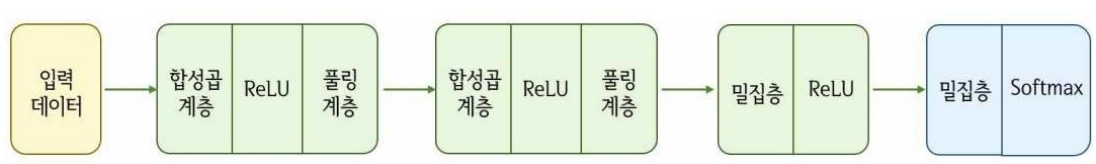

In [ ]:
from typing_extensions import Self
import torch.nn as nn # 신경망 구성 layer
import torch.optim as optim # 최적화 기법
import torch.nn.init # 초기화 기법
import torch.nn.functional as F # Fully-connected layer과 F.cross_entropy()을 사용하기 위해

# torch.nn.Linear(input sample.size(), output sample.size(), bias = True, device = None, dtype =None) data를 선형 변환하며 bias는 True가 default
# torch.nn.ReLu()
class CNN(nn.Module):
    def __init__(self): # 파이썬에서 클래스의 생성자(constructor)에 해당하는 init 함수로, 클래스가 호출되면 자동으로 호출.

        super(CNN, self).__init__()

        # todo code
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 20,out_channels = 10, kernel_size = 5, stride = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2)
        self.fc1 = nn.Linear(160, 80) # fc1과 fc2를 잇는 은닉층(hidden layer)의 뉴런 수는 반드시 100 이하로 할 것
        self.relu = nn.ReLU() # 활성화 함수로 ReLU 사용
        self.fc2 = nn.Linear(80, 110) # fc1과 fc2를 잇는 은닉층(hidden layer)의 뉴런 수는 반드시 100 이하로 할 것


    def forward(self, x): #self 랑 x 매개변수로 상속 받고

        # todo code
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.shape[0],-1) #flatten해주는 코드. x.shape[0]에는 배치 사이즈. view() reshapes the tensor without copying memory, similar to numpy's reshape().
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x # softmax 함수를 쓰지 않은 이유는, loss 함수인 nn.CrossEntropyLoss()에서 내부적으로 softmax를 해준다.

# model.param (모델 안 변수들 호출하는 함수)를 구현하지 않는 이유는 pytorch에 이미 구현되어있음

In [ ]:
def accuracy(predictions, truth):
    """
    하나의 batch에 대한 모델의 예측값과 실제값을 비교하여, 정확도를 계산하는 함수

    매개변수 (Parameters)
    ----------
    predictions : torch.Tensor, shape=(M, D)
        M은 batch를 구성하는 데이터의 개수, D는 분류할 소용돌이의 개수(이번 실습에서는 3으로 사용)
        Step 3에서 정의한 모델의 forward 메서드에서의 출력 인자 그대로가 이 함수에 전달된다고 생각

    truth : torch.Tensor, shape=(M,)
        batch를 구성하는 각각의 데이터(점)가 실제로 어떤 소용돌이에 포함되는지를 0, 1, ..., D-1의 숫자 중 하나로 나타내어 나열한 것
        예를 들어, batch에 3개의 데이터가 들어있고, 각각이 0번, 1번, 1번 소용돌이에 속한다면 truth는 [0, 1, 1]의 배열

    반환 값 (Returns)
    -------
    float형
        해당 batch에 대한 모델의 분류 정확도, 0 이상 1 이하의 실수값
    """
    # 개별 데이터에 대해, predictions에서 구해진 D개의 값 중 가장 큰 값의 인덱스 확인
    # 이 인덱스는 모델은 이 데이터가 어느 소용돌이에 속한다고 판단할지를 의미
    # 이 인덱스, 그리고 해당 데이터의 truth 값이 같은지, 다른지 확인
    predicted_labels = torch.argmax(predictions, axis=1)
    correct = (predicted_labels == truth).float()
    accuracy = correct.mean().item()
    return accuracy


### 학습
모델을 생성했으니 이제 본격적으로 learning rate, epoch, batch size의 hyperparameter을 설정하여 최적화를 하면서 학습을 진행하고, 이때 손실함수(loss function)와 옵티마이저(optimizer, e.g. Adam, SGD)을 사용해볼 것이다.

In [ ]:
model = CNN() # 모델 instantiation for training

# 모델 학습 파라미터 지정 : 바꾸지 말것!!
# tip: 많이 쓰이는 값으로 설정, 돌리면서 tunning
learning_rate = 0.01 # 무조건 작다고 좋지 않다. 너무 작으면 local minimum 에 빠지거나 학습이 느려질 수 있음
batch_size = 55 # 전체 데이터 수에 비해 작은 값을 설정하면 한 epoch당 소요되는 시간이 늘어난다.
epochs = 15

In [ ]:
# 손실 함수 정의
lossfunc = nn.CrossEntropyLoss()

In [ ]:
# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 거의 공식처럼 많이 사용하는 구문으로 model.parameters()는 모델이 학습하면서 내놓은 매개변수를 반환하며
# 이 파라미터를 계속 최적화해나가는 것이 옵티마이저(optimizer)의 역할이다.
# 이전 실습에서는 함수를 추가로 짜서 'def parameters(self):'로 매개변수를 불러왔지만 Pytorch는 사실 이 함수를 .parameters() 함수로 지원한다!

In [ ]:
# 손실 값 저장
loss_values = []
# accuracy 값 저장
acc_values = []

# 아래 부분은 거의 모든 코드에서 규칙처럼 사용하는 부분이라 todo code로 두고 구글링해서 충분히 작성 가능
for epoch in range(epochs):
    for i, traindata in enumerate(train_dataloader):
        img, label = traindata # MNIST 데이터에는 정보와 labeling이 있었으므로 각각을 img와 label로 분리해준다.

        # img 데이터를 이제 학습시키기 위해 forward 함수를 실행한다.
        # forward propagation(순전파)
        prediction = model(img)

        # 앞서 정의한 손실함수를 정의하며 forward를 지난 data와 label간 loss을 계산합니다. 이를 train_loss에 저장할 것이다.
        loss = lossfunc(prediction, label)

        # , Pytorch에서 CNN 학습에서는 주로 optimizer.zero_grad()을 통해 모델 전체의 gradient을 초기화해준다.
        optimizer.zero_grad()

        # back propagation!!
        loss.backward()

        # 매개변수를 매 step마다 업데이트 해준다.
        optimizer.step()

        # 정확도 계산, acc라는 이름으로 저장
        acc = accuracy(F.softmax(prediction, dim = 1), label)

    # 손실 값과 정확도 저장
    loss_values.append(loss.detach().clone().numpy())
    acc_values.append(acc)

    print(f"Epoch {epoch+1}----------------------------")
    print(f"loss: {loss.item():.6f}")
    print(f"acc: {acc:.6f}")


Epoch 1----------------------------
loss: 0.153458
acc: 0.937500
Epoch 2----------------------------
loss: 0.233890
acc: 0.906250
Epoch 3----------------------------
loss: 0.323676
acc: 0.937500
Epoch 4----------------------------
loss: 0.185613
acc: 0.937500
Epoch 5----------------------------
loss: 0.134492
acc: 0.937500
Epoch 6----------------------------
loss: 0.068059
acc: 0.968750
Epoch 7----------------------------
loss: 0.034228
acc: 1.000000
Epoch 8----------------------------
loss: 0.077922
acc: 0.968750
Epoch 9----------------------------
loss: 0.025188
acc: 1.000000
Epoch 10----------------------------
loss: 0.023290
acc: 1.000000
Epoch 11----------------------------
loss: 0.027353
acc: 1.000000
Epoch 12----------------------------
loss: 0.039727
acc: 0.968750
Epoch 13----------------------------
loss: 0.028290
acc: 1.000000
Epoch 14----------------------------
loss: 0.012936
acc: 1.000000
Epoch 15----------------------------
loss: 0.006590
acc: 1.000000


epochs가 진행됨에 따라 점차 정확도가 올라가는 것이 이상적이다. loss는 그럼 반대로 감소하는 방향으로 갈 것이다. Loss를 줄여 accuracy을 높이기 위해선 loss function을 적절하게 사용할 필요가 있다.
Accuracy가 예상보다 너무 낮게 나오거나 증가하는 속도가 낮다면 층 수를 늘리거나, 채널 수를 바꾸거나 활성화 함수를 바꾸는 등 다양한 방법을 시도해보도록 하자!<br><br>

Hint: 책과 완전히 동일한 상황이 아니므로 in, out 채널 수를 계산했던 공식을 떠올려보면서 파라미터를 변경해야 더 높은 정확도를 얻을 수 있다. (물론 책에서 한 그대로 집어넣어도 실행은 되므로 본인이 쓴 코드가 맞는지 확인하고 이후에 정확도를 높여보도록 하자)<br>층을 몇 개 쌓지 않아도 정확도는 97 그 이상까지 갈 수 있는 모델이다.

### train하는 동안 loss와 accuracy의 변화를 그래프로 관찰해보자

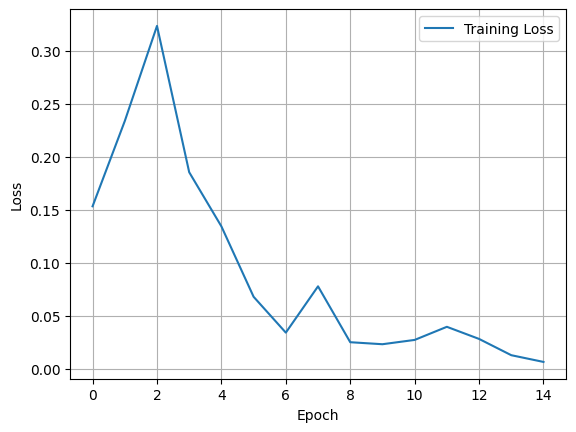

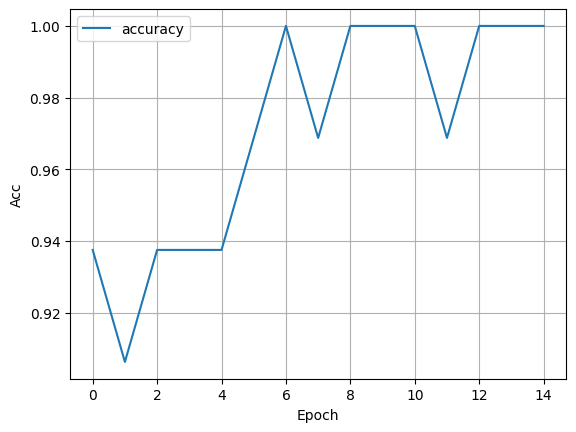

In [ ]:
# Plotting loss values
plt.figure()
plt.plot(loss_values, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(acc_values, label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.grid()
plt.show()

### 학습 결과 확인하기

plot_model_prediction() 함수를 작성하여, index만 입력해주면 이미지와 실제값, 예측값까지 한 번에 손쉽게 시각화할 수 있도록 하자. 실습 앞부분에서 MNIST 이미지를 시각화하는 함수를 이미 살펴본 바 있으니 참고하자.

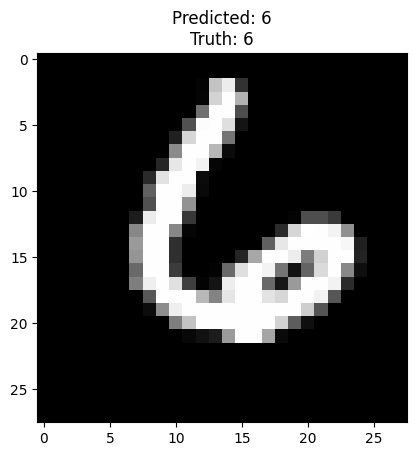

In [ ]:
# 예측 결과를 시각화하는 함수입니다.
def plot_model_prediction(index):
    '''index를 입력받아 index에 해당하는 이미지와 예측 결과를 시각화하는 함수'''
    model.eval()
    img, true_label = test_data[index]
    img = img.unsqueeze(0)  # 모델에 입력하기 위해 차원을 추가합니다.

    with torch.no_grad():
        prediction = model(img)
        predicted_label_index = torch.argmax(prediction, axis=1).item()

    # 이미지, 실제 라벨, 예측 라벨 모두 시각화
    fig, ax = plt.subplots()
    ax.imshow(img.squeeze().numpy(), cmap="gray")
    ax.set_title(f"Predicted: {predicted_label_index}\nTruth: {true_label}")

    return fig, ax

# x_test의 랜덤 데이터를 시각화
index = np.random.randint(0, len(test_data))
plot_model_prediction(index)
plt.show()

그다음, 실제 정답 라벨을 사용하여 모델이 잘못 예측한 사례들을 찾고, 그 중 일부를 그래프로 표시해보자.

In [ ]:
# 모델 평가 및 잘못 예측한 데이터 수집
def error_check(model, test_loader):
    model.eval()
    incorrect_samples = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            # 잘못 예측한 데이터 수집
            for i in range(len(target)):
                if pred[i] != target[i]:
                    incorrect_samples.append((data[i], pred[i].item(), target[i].item()))

    return incorrect_samples

# 시각화 함수 정의
def visualize_misclassified(incorrect_samples):
    fig = plt.figure(figsize=(10, 10))
    for i in range(min(25, len(incorrect_samples))):
        sample = incorrect_samples[i]
        img = sample[0].numpy().squeeze()
        pred_label = sample[1]
        true_label = sample[2]
        ax = fig.add_subplot(5, 5, i+1)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Pred: {pred_label}, True: {true_label}')
        ax.axis('off')
    plt.show()


전체 데이터 개수 : 10000
잘못 예측한 데이터 개수 : 195


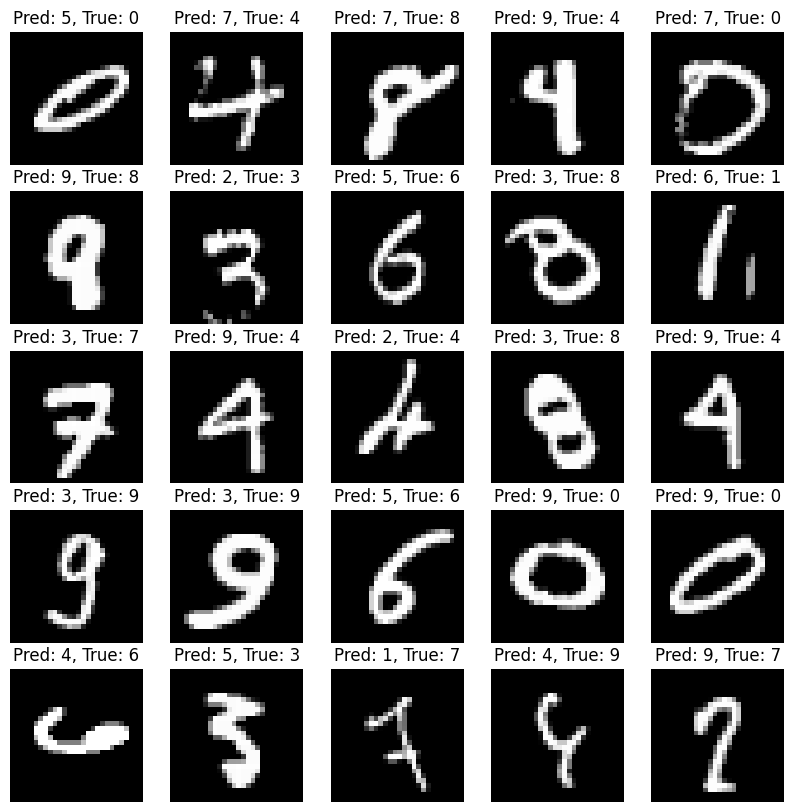

In [ ]:
# 모델 평가 및 잘못 예측한 데이터 시각화
print(f"전체 데이터 개수 : {len(test_data)}")
print(f"잘못 예측한 데이터 개수 : {len(error_check(model, test_dataloader))}")
incorrect_samples = error_check(model, test_dataloader)
visualize_misclassified(incorrect_samples)